In [2]:
import akshare as ak
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import talib
import numpy as np
from matplotlib.font_manager import FontProperties
import os
import mplfinance as mpf 
import importlib
import utils
importlib.reload(utils)

%matplotlib inline
# 添加字体
matplotlib.rcParams['axes.unicode_minus']=False # 如果不加入下面这一句，会导致负号无法显示
plt.rcParams["font.sans-serif"] = ["SimHei"]

      Unnamed: 0       净值日期    累计净值
0              0 2013-02-06  1.0000
1              1 2013-02-08  1.0022
2              2 2013-02-22  0.9954
3              3 2013-03-01  1.0135
4              4 2013-03-08  0.9980
...          ...        ...     ...
2382        2382 2022-12-12  1.9833
2383        2383 2022-12-13  1.9729
2384        2384 2022-12-14  1.9646
2385        2385 2022-12-15  1.9663
2386        2386 2022-12-16  1.9572

[2387 rows x 3 columns]


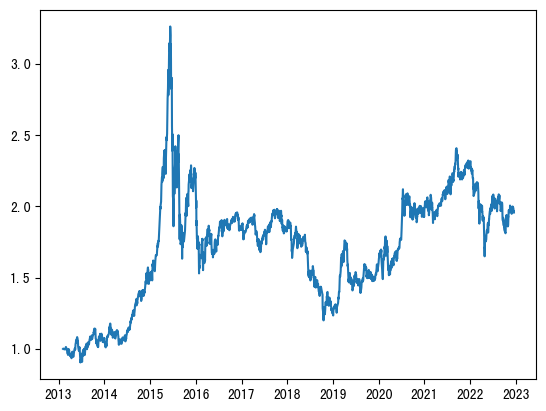

In [3]:
fund_code = "510500"

fund_file = f"{fund_code}.csv"

if not os.path.exists(f"{fund_code}.csv"):
    df_fund = ak.fund_open_fund_info_em(fund=fund_code, indicator="累计净值走势")
    df_fund.to_csv(fund_file)
else:
    df_fund = pd.read_csv(fund_file)
    df_fund['净值日期'] = pd.to_datetime(df_fund['净值日期'], format='%Y-%m-%d')


print(df_fund)
plt.plot(df_fund['净值日期'],df_fund['累计净值'])

和均线差异的均值： 0.04065754094293972
正差异的分布：
count    1334.000000
mean        0.121352
std         0.155693
min         0.000075
0%          0.000075
10%         0.014961
20%         0.027327
30%         0.039615
40%         0.053156
50%         0.067909
60%         0.087456
70%         0.112893
80%         0.186523
90%         0.261805
100%        0.961931
max         0.961931
Name: _diff, dtype: float64
负差异的分布：
count    812.000000
mean      -0.091912
std        0.073425
min       -0.290354
0%        -0.290354
10%       -0.193644
20%       -0.170076
30%       -0.146658
40%       -0.099342
50%       -0.070138
60%       -0.049090
70%       -0.033364
80%       -0.020630
90%       -0.009804
100%      -0.000268
max       -0.000268
Name: _diff, dtype: float64
差异图：
      Unnamed: 0       date   close        ma     _diff
0              0 2013-02-06  1.0000       NaN       NaN
1              1 2013-02-08  1.0022       NaN       NaN
2              2 2013-02-22  0.9954       NaN       NaN
3            

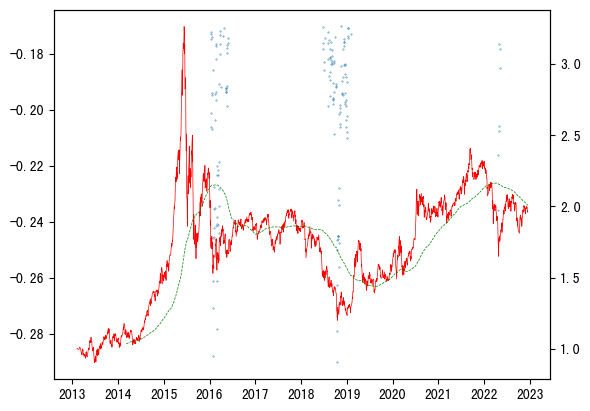

In [4]:
df_fund.rename(columns={'净值日期': 'date', '累计净值': 'close'}, inplace=True)

df = df_fund

# start_date = '20150101'
# end_date = '20171231'
# df = df[(df.date > start_date) & (df.date < end_date)]

df['ma'] =  talib.SMA(df.close, timeperiod=242)
df['_diff'] =  (df.close-df.ma)/df.ma

print("和均线差异的均值：",df._diff.mean())

print("正差异的分布：")
print(df[df._diff>0]._diff.describe(percentiles=np.linspace(0,1,11)))

print("负差异的分布：")
print(df[df._diff<0]._diff.describe(percentiles=np.linspace(0,1,11)))

print("差异图：")
print(df)

fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.plot(df.date,df._diff,color='b',linewidth=0.5)

p20 = df[df._diff<0]._diff.quantile(0.2)
df1 = df[df._diff<p20]
print(f"低于{p20}的偏离均值的点")
print(df1)
ax1.scatter(df1.date,df1._diff,s=0.1)

ax2 = ax1.twinx()
ax2.plot(df.date,df.close,color='r',linewidth=0.5)
ax2.plot(df.date,df.ma,linestyle='--',linewidth=0.5,color='g')

<AxesSubplot: >

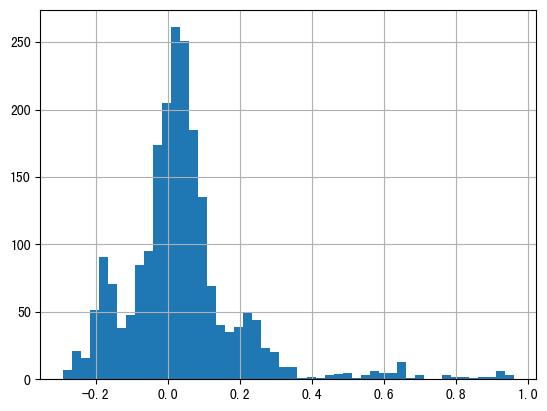

In [8]:
df._diff.hist(bins=50)